In [33]:
import numpy as np
data = np.loadtxt('dataset-two.txt')

In [34]:
np.save('data.npy',data)

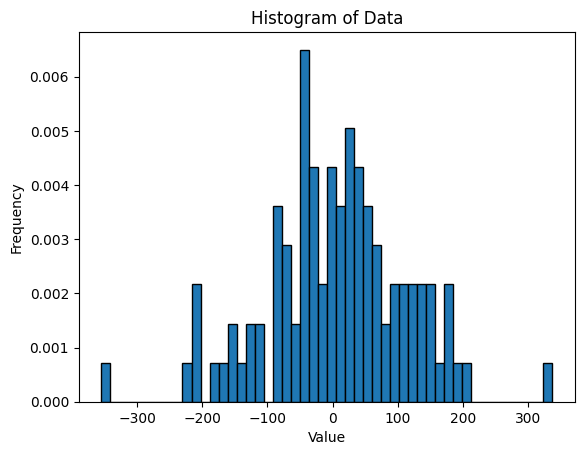

In [35]:
data = np.load('dataset-two.npy')
import matplotlib.pyplot as plt
plt.hist(data, bins=50, edgecolor='black', density=True)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## From the above Histogram plot, it appears to be normal distibution.

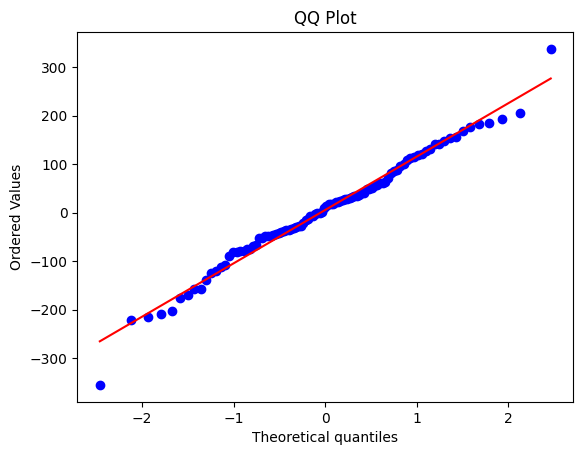

In [36]:
import scipy.stats as stats
import matplotlib.pyplot as plt
data = np.load('dataset-two.npy')
# create a QQ plot
stats.probplot(data, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()

From the QQ plot, all the data are almost on the straight line. 

Since the dataset-two is small, the best test to check its normality is Shapiro-Wilk test which we will do now: 

In [37]:
from scipy import stats
import numpy as np
# perform Shapiro-Wilk test
data = np.load('dataset-two.npy')
stat, p_value = stats.shapiro(data)

# Output the result

print(f"Shapiro-Wilk test: Statistics = {stat}, p-value = {p_value}")
if p_value > 0.05:
    print("The data is likely normally distributed")
else:
    print("The data is not normally distributed")

Shapiro-Wilk test: Statistics = 0.9873178652916993, p-value = 0.45934863105952123
The data is likely normally distributed


As is clear from the Shapiro-Wilk test, the data is normally distributed. To confirm our assesment, we will perform yet another test best suited for small data, namely, Anderson-Darling test as follows:

In [38]:
from scipy import stats

data = np.load('dataset-two.npy')
result = stats.anderson(data, dist='norm')
# Output the results

print(f"Anderson-Darling Test: Statistic = {result.statistic}")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At {sl}% significance level, the data looks normally distributed.")
    else:
        print(f"At {sl}% significance level, the data does not look normally distributed.")

Anderson-Darling Test: Statistic = 0.359539031493199
At 15.0% significance level, the data looks normally distributed.
At 10.0% significance level, the data looks normally distributed.
At 5.0% significance level, the data looks normally distributed.
At 2.5% significance level, the data looks normally distributed.
At 1.0% significance level, the data looks normally distributed.


From above, we get the test statistic to be 0.359539031493199, which after comparing with the critical values at significance levels 1.0%, 2.5%, 5.0%, 10.0%, 15.0% concludes the normality of data. Hence we do not have enough evidence to reject the null hypothesis. 

In [39]:
from scipy import stats
import numpy as np
# Perform Kolmogorov-Smirnov test
data = np.load('dataset-two.npy')
stat, p_value = stats.kstest(data, 'norm')

print(f"KS Test: Statistic = {stat}, p-value = {p_value}")
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")

KS Test: Statistic = 0.51, p-value = 1.2007494929505019e-24
The data is not normally distributed.


## Although we have done KS-test, but it is best suited for bigger datas. Therefore, its outcome as not normality will not be much relevent for us to continue with the assumption of normality of dataset-two. 

## Moreover, we have done more tests for the normality of dataset-two and have got the output as "The data is normally distributed". 

In [40]:
import numpy as np
from scipy.stats import normaltest

data = np.load('dataset-two.npy')

# Perform the D'Agostino and Pearson's test for normality
stat, p_value = normaltest(data)

print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The data is not normally distributed (reject H0).")
else:
    print("The data is normally distributed (fail to reject H0).")


Test Statistic: 3.459699940413559
P-value: 0.17731100990858858
The data is normally distributed (fail to reject H0).


In [41]:
from scipy import stats

# Perform D'Agostino's K-squared test
data = np.load('dataset-two.npy')
stat, p_value = stats.normaltest(data)

print(f"D'Agostino's K-squared Test: Statistic = {stat}, p-value = {p_value}")
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")

D'Agostino's K-squared Test: Statistic = 3.459699940413559, p-value = 0.17731100990858858
The data is likely normally distributed.


In [42]:
from scipy import stats

# Perform Jarque-Bera test
data = np.load('dataset-two.npy')
stat, p_value = stats.jarque_bera(data)

print(f"Jarque-Bera Test: Statistic = {stat}, p-value = {p_value}")
if p_value > 0.05:
    print("The data is likely normally distributed.")
else:
    print("The data is not normally distributed.")

Jarque-Bera Test: Statistic = 3.311754646182288, p-value = 0.19092447975233515
The data is likely normally distributed.


In [43]:
data = np.load('dataset-two.npy')
mean = np.mean(data)
std_dev = np.std(data)

within_1_std = np.sum((data > mean - std_dev) & (data < mean + std_dev)) / len(data)
within_2_std = np.sum((data > mean - 2*std_dev) & (data < mean + 2*std_dev)) / len(data)
within_3_std = np.sum((data > mean - 3*std_dev) & (data < mean + 3*std_dev)) / len(data)

print(f"Within 1 std dev: {within_1_std*100}%")
print(f"Within 2 std dev: {within_2_std*100}%")
print(f"Within 3 std dev: {within_3_std*100}%")

Within 1 std dev: 70.0%
Within 2 std dev: 96.0%
Within 3 std dev: 98.0%


In [44]:
from scipy.stats import skew, kurtosis
data = np.load('dataset-two.npy')

skewness = skew(data)
kurt = kurtosis(data)

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Skewness: -0.18735327780787794
Kurtosis: 0.8089598953361814


In [45]:
import numpy as np
data = np.load('dataset-two.npy')
mean_data = np.mean(data)
print("Mean using numpy:", mean_data)

Mean using numpy: 5.503125937150323


In [46]:
import numpy as np
data = np.load('dataset-two.npy')

population_mean = 5

t_statisctic, p_value = stats.ttest_1samp(data, population_mean)

print(f"t_statisctic: {t_statisctic}")
print(f"p_value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(f"Reject the null hypothesis (p < alpha). The mean is significantly different from {population_mean}")
else:
    print(f"Fail to reject the null hypothesis (p >= {alpha}). There is not enough evidence to say the mean is different from {population_mean}.")

t_statisctic: 0.046014073635481344
p_value: 0.9633917237387875
Fail to reject the null hypothesis (p >= 0.05). There is not enough evidence to say the mean is different from 5.


In [47]:
import numpy as np
import scipy.stats as stats

# Load your dataset
data = np.load('dataset-two.npy')

# Calculate the sample mean and standard error
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)  # sample standard deviation
n = len(data)

# Calculate the 95% confidence interval
confidence_level = 0.95
degrees_freedom = n - 1
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_std / np.sqrt(n))

print(f"Sample Mean: {sample_mean}")
print(f"95% Confidence Interval: {confidence_interval}")


Sample Mean: 5.503125937150323
95% Confidence Interval: (np.float64(-16.192649602000564), np.float64(27.19890147630121))


In [48]:
from sklearn.utils import resample
data = np.load('dataset-two.npy')

# Resample the data many times (e.g., 10,000) to get a distribution of sample means
n_iterations = 10000
bootstrap_means = []

for _ in range(n_iterations):
    bootstrap_sample = resample(data)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Calculate the 95% confidence interval of the bootstrap means
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f"Bootstrap Mean Estimate: {np.mean(bootstrap_means)}")
print(f"95% Confidence Interval from Bootstrap: [{lower_bound}, {upper_bound}]")


Bootstrap Mean Estimate: 5.567791796817069
95% Confidence Interval from Bootstrap: [-15.880899653193087, 27.07419122679976]
